# TASK-2: MOVIE RATING PREDICTION 

  Domain : Data Science 

  Aim : Build a model that predicts the rating of a movie based on features like genre , director and actors 


### IMPORTING IMPORTANT LIBRARIES 

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

### IMPORT DATASET

In [116]:
# Example using pandas to read a CSV file  
import pandas as pd  

# Replace 'your_file.csv' with your file name  
data = pd.read_csv('IMDb Movies India.csv', encoding='ISO-8859-1')
data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
data.shape


(15509, 10)

### DATA CLEANING

In [118]:

data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [120]:
data.duplicated().sum()

6

In [121]:
data.dropna(inplace = True)

In [122]:
data.shape

(5659, 10)

In [123]:
data.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [124]:
data.drop_duplicates(inplace=True)

In [125]:
data.shape

(5659, 10)

In [126]:
data.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

### DATA PRE-PROCESSING

 Data have to be processed to make more easier to derive insights from it and pre processed will be more suitable while fitting the data into an algorithm


In this project we have processed the data by column wise based on the requirement. 

In [127]:
# Replacing the brackets from year column
data['Year'] =data['Year'].str.replace(r'[()]','',regex=True).astype(int)                          

In [128]:
# Remove the min word from 'Duration' column and convert all values to numeric
data['Duration']= pd.to_numeric(data['Duration'].str.replace('min',''))

In [129]:
# Splitting the genre by ,to keep only unique genres and replacing the null values with mode
data['Genre'] =data['Genre'].str.split(',')
data = data.explode('Genre')
data['Genre'].fillna(data['Genre'].mode()[0], inplace =True)

C:\Users\91789\AppData\Local\Temp\ipykernel_26960\394751607.py:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [130]:
# Convert 'Votes' to numeric and replace the , to keep only numerical part 
data['Votes'] = pd.to_numeric(data['Votes'].str.replace(',',''))

In [131]:
# Checking the dataset is theer any null values present and data types of the features present 
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11979 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      11979 non-null  object 
 1   Year      11979 non-null  int32  
 2   Duration  11979 non-null  int64  
 3   Genre     11979 non-null  object 
 4   Rating    11979 non-null  float64
 5   Votes     11979 non-null  int64  
 6   Director  11979 non-null  object 
 7   Actor 1   11979 non-null  object 
 8   Actor 2   11979 non-null  object 
 9   Actor 3   11979 non-null  object 
dtypes: float64(1), int32(1), int64(2), object(6)
memory usage: 982.7+ KB


### DATA VISUALIZING 

- Visualization part is done to show the relationship between the feature present in the dataset.
- In this project , we have used multiple charts to see the relations within components of data which involves in the result 

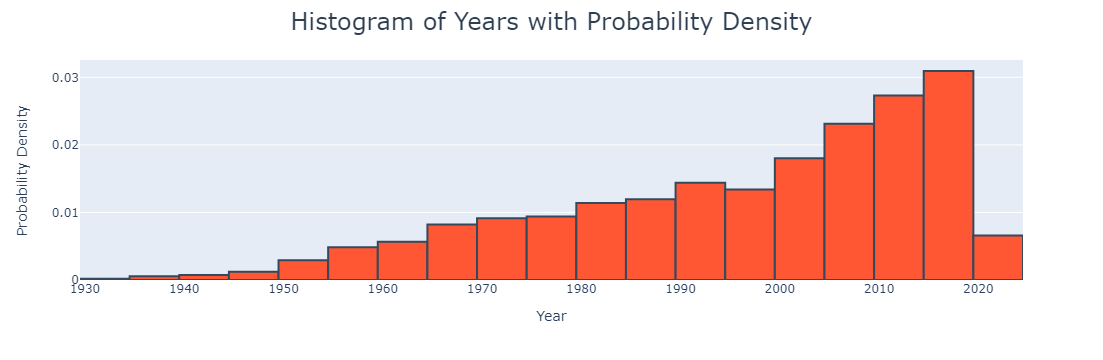

In [150]:
import plotly.express as px  

# Create the histogram  
year = px.histogram(  
    data,  
    x='Year',  
    histnorm='probability density',  
    nbins=30,  
    color_discrete_sequence=['#FF5733']  # Set your desired color(s) here  
)  

# Customize the layout  
year.update_layout(  
    title='Histogram of Years with Probability Density',  
    title_x=0.5,  
    title_pad=dict(t=20),  
    title_font=dict(size=24, color='#2c3e50'),  # Change font size and color  
    xaxis_title='Year',  
    yaxis_title='Probability Density',  
     # Changed template for a different style  
)  

# customize the bars' appearance  
year.update_traces(marker=dict(line=dict(width=2, color='#34495e')))  # Add border color to bars  

# Show the updated histogram  
year.show()

C:\Users\91789\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



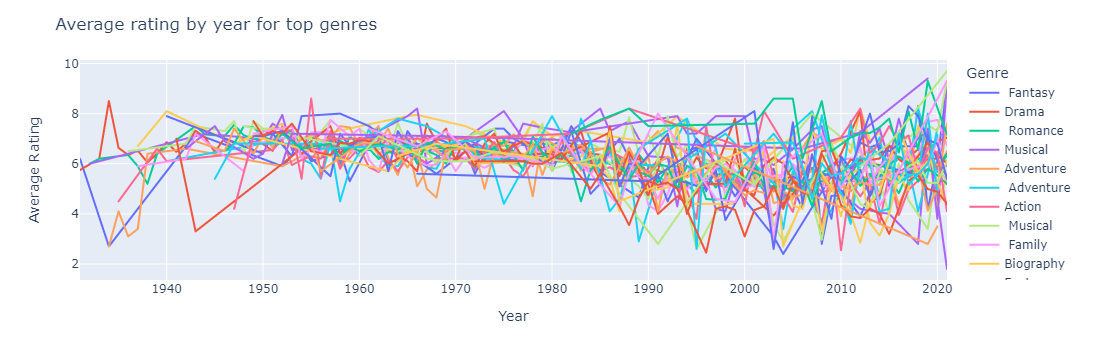

In [139]:
# Group data by year and calculate the average rating
avg_rating_by_year = data.groupby(['Year' ,'Genre',])['Rating'].mean().reset_index()
#get the top 10 genres
top_genres = data['Genre'].value_counts().head(10).index
# filter the data to include only the top3 genres
average_rating_by_year = avg_rating_by_year[avg_rating_by_year['Genre'].isin(top_genres)]
#Create the line plot with plotly express
fig =px.line(avg_rating_by_year , x= 'Year' ,y ='Rating',color = 'Genre')

#updating the details into chart like title and hue
fig.update_layout(title='Average rating by year for top genres', xaxis_title='Year',yaxis_title='Average Rating')

# show the plot
fig.show()

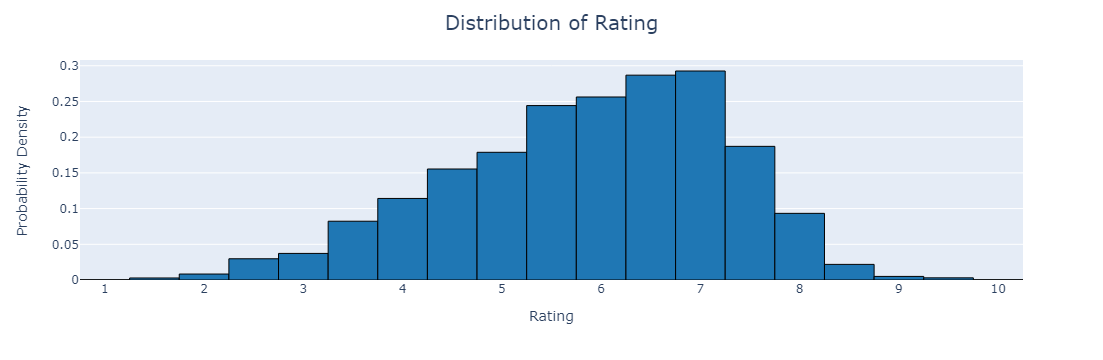

In [148]:
 # Create the histogram  
rating_fig = px.histogram(  
    data,  
    x='Rating',  
    histnorm='probability density',  
    nbins=40,  
    color_discrete_sequence=['#1f77b4']  # Change this color to your preference  
)  

# Update layout and customize title and axes  
rating_fig.update_layout(  
    title='Distribution of Rating',  
    title_x=0.5,  
    title_pad=dict(t=20),  
    title_font=dict(size=20),  
    xaxis_title='Rating',  
    yaxis_title='Probability Density'  
)  

# Optionally, customize the histogram bars' appearance  
rating_fig.update_traces(marker=dict(line=dict(width=1, color='#000000')))  # Add border color to bars  

# Show the updated histogram  
rating_fig.show()

### FEATURE ENGINEERING 


In [43]:
# Importing essential libraries for model building 
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score

In [44]:
# Dropping Name column because it doesn't impact the outcome
data.drop('Name' , axis =1 ,inplace =True)

In [45]:
# Grouping the columns with  their average rating and then creating a new feature

genre_mean_rating = data.groupby('Genre')['Rating'].transform('mean')
data['Genre_mean_rating'] = genre_mean_rating

director_mean_rating =data.groupby('Director')['Rating'].transform('mean')
data['Director_encoded'] = director_mean_rating

actor1_mean_rating =data.groupby('Actor 1')['Rating']. transform('mean')
data['Actor1_encoded'] = actor1_mean_rating

actor2_mean_rating = data .groupby('Actor 2')['Rating'] .transform('mean')
data['Actor2_encoded'] = actor2_mean_rating

actor3_mean_rating =data.groupby('Actor 3')['Rating'] .transform('mean')
data['Actor3_encoded'] = actor3_mean_rating


In [46]:
# Keeping the prediction and target variable 
x= data[['Year','Votes', 'Duration', 'Genre_mean_rating', 'Director_encoded', 'Actor1_encoded', 'Actor2_encoded' , 'Actor3_encoded']]
y= data['Rating']
        


In [47]:
# Splitting the dataset into trainig and testing parts 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.2, random_state =42)

### MODEL BUILDING

In [48]:
# Building machine learning model and training them
Model = LinearRegression()
Model.fit(x_train,y_train)
Model_pred = Model.predict(x_test)

In [49]:
# Evaluating the performance of model with evaluation metrics
print('The Performance evaluation of Logistic Regression is below: ', '\n')
print('Mean Squared error:' ,mean_squared_error(y_test, Model_pred))
print('Mean absolute error:' ,mean_absolute_error(y_test,Model_pred))
print('R2 Score:' , r2_score(y_test, Model_pred))
                                    

The Performance evaluation of Logistic Regression is below:  

Mean Squared error: 0.4463977880886111
Mean absolute error: 0.4921055068501123
R2 Score: 0.7641906900948997


### MODEL TESTNG

In [50]:
x.head(5)

,Year,Votes,Duration,Genre_mean_rating,Director_encoded,Actor1_encoded,Actor2_encoded,Actor3_encoded
1,2019,8,109,6.248697,7.000000,6.850000,7.00,7.00
3,2019,35,110,5.838423,4.400000,5.250000,4.40,4.46
3,2019,35,110,5.838739,4.400000,5.250000,4.40,4.46
5,1997,827,147,5.838423,5.335135,4.793617,5.73,5.93
5,1997,827,147,5.875793,5.335135,4.793617,5.73,5.93


In [51]:
y.head(5)

1    7.0
3    4.4
3    4.4
5    4.7
5    4.7
Name: Rating, dtype: float64

In [52]:
# For testing , we create a new dataframe with values close to the any of our existing data to evaluate.
data= {'Year': [2019], 'Votes': [36], 'Duration': [111], 'Genre_mean_rating': [5.8], 'Director_encoded':[4.5],'Actor1_encoded':[5.3],'Actor2_encoded':[4.5] ,'Actor3_encoded':[4.5]}             
trail = pd.DataFrame(data)


In [53]:
# Predict the movie rating entered data  
rating_predicted = Model.predict(trail)  

# Formatting the predicted result  
predicted_rating = rating_predicted[0]  
formatted_rating = f"{predicted_rating:.2f}"  # Format to two decimal places  

# Display the predicted result with context  
print("\n🎬 Movie Rating Prediction 🎬")  
print("-" * 30)  
print(f"Based on the provided data, the predicted movie rating is: **{formatted_rating}**")  
print("-" * 30)  

# Optional: Display input data if relevant  
print("Input Data Used for Prediction:")  
print(trail)


🎬 Movie Rating Prediction 🎬
------------------------------
Based on the provided data, the predicted movie rating is: **4.21**
------------------------------
Input Data Used for Prediction:
   Year  Votes  Duration  Genre_mean_rating  Director_encoded  Actor1_encoded  \
0  2019     36       111                5.8               4.5             5.3   

   Actor2_encoded  Actor3_encoded  
0             4.5             4.5  
